<a href="https://colab.research.google.com/github/wuwen1030/hello-langgraph/blob/main/hello_langgraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install langgraph

In [ ]:

from typing_extensions import TypedDict

class State(TypedDict):
  graph_state: str


In [ ]:
def node_1(state):
  print("---- node 1 ----")
  return {"graph_state": state["graph_state"] + "I am "}

def node_2(state):
  print("---- node 2 ----")
  return {"graph_state": state["graph_state"] + "happy"}

def node_3(state):
  print("---- node 3 ----")
  return {"graph_state": state["graph_state"] + "sad"}

In [ ]:
from typing import Literal
import random

def decide_mood(state) -> Literal["node_2", "node_3"]:
  if random.random() > 0.5:
    return "node_3"
  else:
    return "node_2"

In [ ]:
from IPython.display import display, Image
from langgraph.graph import StateGraph, START, END

builder = StateGraph(State)
builder.add_node("node_1", node_1);
builder.add_node("node_2", node_2);
builder.add_node("node_3", node_3);

builder.add_edge(START, "node_1");
builder.add_conditional_edges("node_1", decide_mood);
builder.add_edge("node_2", END);
builder.add_edge("node_3", END);

graph = builder.compile()

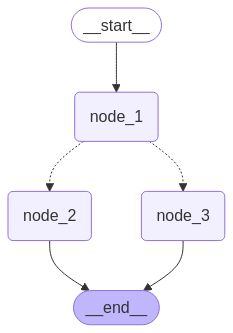

In [ ]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
graph.invoke({"graph_state": "I am Ben. "})

---- node 1 ----
---- node 3 ----


{'graph_state': 'I am Ben. I am sad'}